# Assignment Sheet 2

Bruce Schultz  
bschultz@uni-bonn.de

Miguel A. Ibarra-Arellano  
ibarrarellano@gmail.com

## Exercise 1

bareNuc contains null values
DSC of uniCelShape and uniCelS = 93.41917024320458
DSC of uniCelShape and bareNuc = 94.13447782546496
DSC of uniCelShape and blaChroma = 93.2761087267525
DSC of uniCelShape and thickness = 94.70672389127324
DSC of uniCelS and uniCelShape = 93.41917024320458
DSC of uniCelS and bareNuc = 94.70672389127324
DSC of uniCelS and blaChroma = 92.98998569384835
DSC of uniCelS and thickness = 93.8483547925608
DSC of bareNuc and uniCelShape = 94.13447782546496
DSC of bareNuc and uniCelS = 94.70672389127324
DSC of bareNuc and blaChroma = 92.27467811158799
DSC of bareNuc and thickness = 93.8483547925608
DSC of blaChroma and uniCelShape = 93.2761087267525
DSC of blaChroma and uniCelS = 92.98998569384835
DSC of blaChroma and bareNuc = 92.27467811158799
DSC of blaChroma and thickness = 93.41917024320458
DSC of thickness and uniCelShape = 94.70672389127324
DSC of thickness and uniCelS = 93.8483547925608
DSC of thickness and bareNuc = 93.8483547925608
DSC of thickness and bla

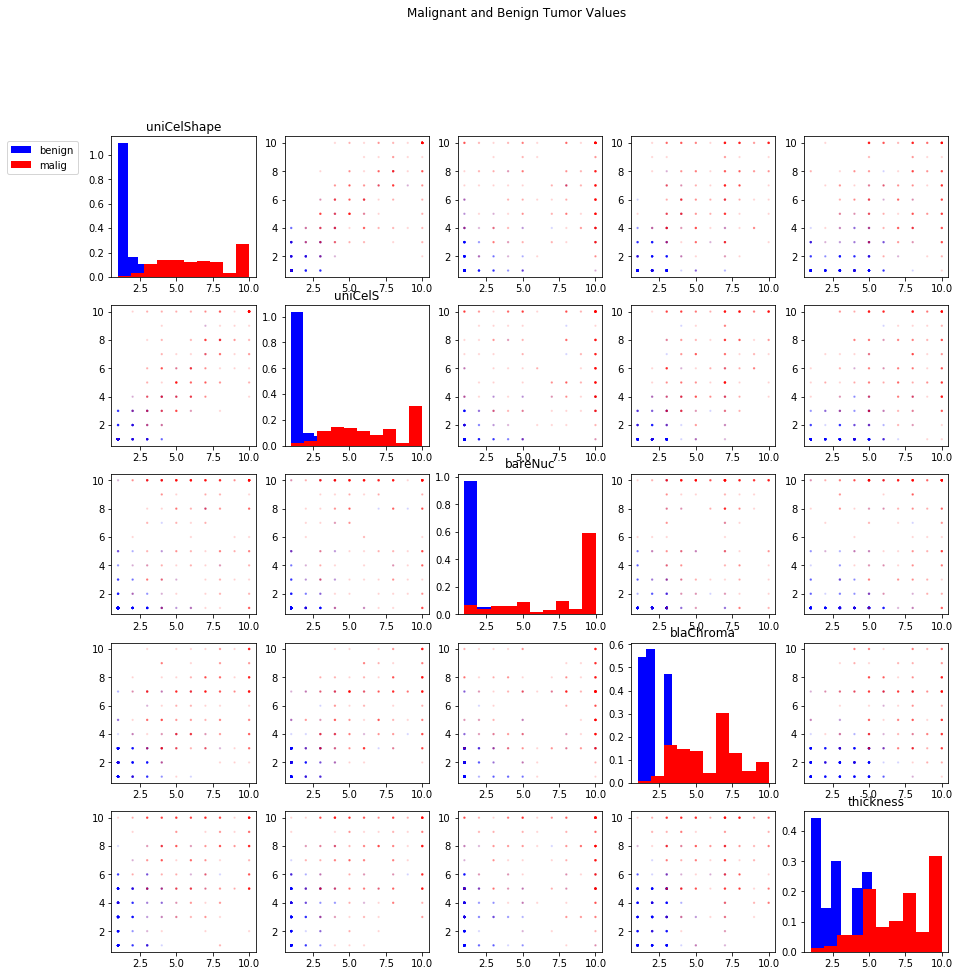

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

bc_data_full = pd.read_excel('breast-cancer-wisconsin.xlsx')

def color_list(variableList):
    color_list = []
    for row in variableList:
        if row == 2:
            color_list.append('blue')
        else:
            color_list.append('red')
    return color_list

def cluster_center(points):
    '''
    Computes the center point from a list of points
    :param points: Can be a list of lists of tuples containing points
    :return: A list with center point for each set of points provided, in numpy array format
    '''
    cluster_centers = [np.array([0, 0]) for dataset in points]
    for i in range(len(points)):
        for datapoint in points[i]:
            cluster_centers[i] = np.add(np.array(datapoint), cluster_centers[i])
        cluster_centers[i] = cluster_centers[i]/len(points[i])
    return cluster_centers

def DSC(point_list):
    '''
    Computers Distance consistency for a set (or sets) of points
    :param point_list: A list of points in tuple format
    :return: Numerical computation of the Distance consistency for all points provided
    '''
    # First computer center points
    centers = cluster_center(point_list)
    #Create empty lists to store distances of the difference between each point and each centroid
    same_cluster_distances = []
    diff_cluster_distances = []
    for i in range(len(point_list)):
        for datapoint in point_list[i]:
            for j in range(len(point_list)):
                # Alternate between same centroid and diff centroids, store in list
                if i == j:
                    same_cluster_distances.append(np.linalg.norm(np.array(datapoint) - centers[i]))
                else:
                    diff_cluster_distances.append(np.linalg.norm(np.array(datapoint) - centers[j]))
    # Create counter to keep track points closer to their own centroid
    closer_points = 0
    for k in range(len(same_cluster_distances)):
        if same_cluster_distances[k] < diff_cluster_distances[k]:
            closer_points += 1
    return (100*closer_points/len(same_cluster_distances))

def find_missing_values(pds_array):
    '''
    :param A pandas dataframe:
    :return: A list containing the column names which have null values
    '''
    null_vectors = []
    for i in pds_array.columns.values:
        if pds_array[i].isnull().values.any():
            null_vectors.append(i) #Add to list of vectors with missing values
            print("{} contains null values".format(i))
    if not null_vectors:
        print("No null values were found")
    return null_vectors

def interpolate_values(pandasDF):
    '''
    Interpolate null values using average for vector by class
    :param pandasDF: Full pandas dataframe
    :return: Concatenated pandas dataframe with null values replaced
    '''
    null_vectors = find_missing_values(pandasDF)
    for vector in null_vectors:
        #Slice empty vectors
        benign = pandasDF[pandasDF['class'] == 2]
        malig = pandasDF[pandasDF['class'] == 4]

        #Drop na and find average for each class, rounded to nearest integer
        benign_av = int(round(np.mean(benign[vector].dropna())))
        malig_av = int(round(np.mean(malig[vector].dropna())))

        #Fill null with average values
        benign = benign.fillna(benign_av)
        malig = malig.fillna(malig_av)

        #Concatenate pandas frames
        pandasDF_no_null = pd.concat([benign, malig])
    return pandasDF_no_null


def scat_matrix():
    # Using pandas just to import data
    columns = list(pd.read_csv('reduced_data.csv').columns.values)
    if columns[0] == 'Unnamed: 0': #In case using old data set
        columns = columns[1:]
    bc_data = pd.read_excel('breast-cancer-wisconsin.xlsx')

    #Interpolate missing data
    bc_data = interpolate_values(bc_data)

    #Generate figure for plots to be plotted in
    size = len(columns)
    fig, subs = plt.subplots(size, size, figsize=(15, 15))

    #Create colors list
    colors = color_list(list(bc_data['class']))

    #Used for tracking plot placement
    i = 0
    j = 0

    #Iterate through column names and generate plots
    for axis1 in columns:
        for axis2 in columns:
            if axis1 == axis2:
                #Make diagonal plots different
                benign_sd = list(bc_data[bc_data['class'] == 2][axis1])
                malig_sd = list(bc_data[bc_data['class'] == 4][axis1])

                #Generate histogram, density parameter means normalized
                subs[i, j].hist(benign_sd, color = 'blue', label = 'benign', histtype='bar', density=True)
                subs[i, j].hist(malig_sd, color='red', label='malig', histtype='bar', density=True)
                subs[i, j].set_title(axis1) #Can you optional 'y=###' parameter to move title
            else:
                #Set low alpha so overlapping points look darker, alter size of dot instead?
                #TODO make repeat points bigger and not just darker
                subs[i, j].scatter(bc_data[axis1], bc_data[axis2], alpha=0.1, c=colors, s=2)
                benign_a1 = list(bc_data[bc_data['class'] == 2][axis1])
                malig_a1 = list(bc_data[bc_data['class'] == 4][axis1])
                benign_a2 = list(bc_data[bc_data['class'] == 2][axis2])
                malig_a2 = list(bc_data[bc_data['class'] == 4][axis2])
                all_points = [list(zip(benign_a1, benign_a2)), list(zip(malig_a1, malig_a2))]
                print('DSC of {} and {} = {}'.format(axis1, axis2, DSC(all_points)))

            # Increase counter
            if i < size-1:
                i += 1
            else:
                i = 0
                j += 1

    # Figure attributes
    subs[0, 0].legend(bbox_to_anchor=(-0.2, 1.0))
    fig.suptitle('Malignant and Benign Tumor Values', x=0.5, y=1.0)
    
    fig.savefig('Scatter Plot.png')
    fig.show()

scat_matrix()

In [ ]:
#TODO answer questions